,data_type,species,diff_ratio,r_avg,r_std
5,BBv2,Escherichia,-0.051830,1.572554,1.550090
6,BBv2,Salmonella,-0.053759,1.534165,1.575707
7,BBv2,Pseudomonas,-0.060936,1.650835,1.596873


[-5.64915602 -6.15832814 -6.59579534]


,species,align_ratio,pred_ratio
5,Escherichia,6.82,12.47
6,Salmonella,6.62,12.78
7,Pseudomonas,5.91,12.50


align RMSE:  5.564636394986456
adjust RMSE:  0.6004671983068133
['1', 'x', 'x^2']
[-10.37597132  32.98671098 -16.91186539]
-5.7700898110279955


<IPython.core.display.Javascript object>


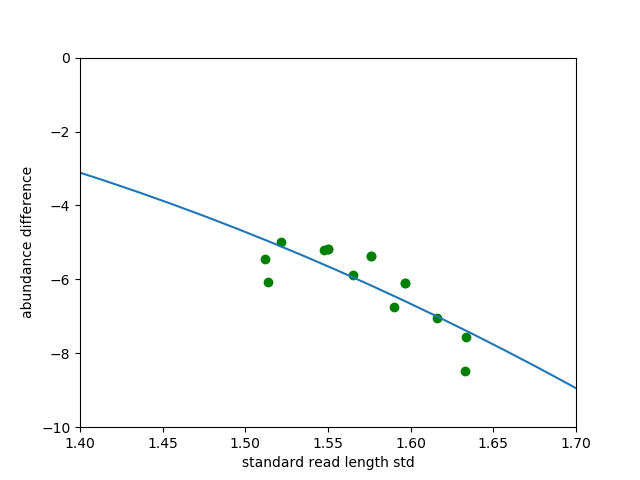

In [17]:
%matplotlib notebook
%run data_path.ipynb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d
import numpy as np

loman = [7.32,  2.56,  0.24, -0.72, -2.01, -2.07, -2.30, -2.72, -0.08, -0.22]

sample="BBv2"
k=2
truer = [12] * 3
gram = gram_neg


regr_df = pd.read_excel("regression_data.xlsx")

test_df = regr_df[regr_df.data_type == sample]
train_df = regr_df[regr_df.data_type != sample]

train_df = regr_df[regr_df.data_type != "BBv1"]
train_df = train_df[train_df.data_type != "MPZv1"]
# display(train_df)

train_df = train_df[train_df.species.isin(gram)]
test_df = test_df[test_df.species.isin(gram)]

display(test_df)

train_x = train_df["r_std"].values.tolist()
train_y = train_df["diff_ratio"].values.tolist()
train_y = [x*100 for x in train_y]
test_x = test_df["r_std"].values.tolist()
test_y = test_df["diff_ratio"].values.tolist()
test_y = [x*100 for x in test_y]
# print(test_y)

poly = PolynomialFeatures(degree=k)
X_ = np.array(train_x)
tX_ = np.array(test_x)
poly_name = X_.reshape(-1,1)
X_ = X_.reshape(-1,1)
X_ = poly.fit_transform(X_)
tX_ =tX_.reshape(-1,1)
testX_ = poly.fit_transform(tX_)


model = HuberRegressor()
model.fit(X_, train_y)

pred_y = model.predict(testX_)
print(pred_y)

pred_df = test_df.copy()
pred_df.drop(["data_type","r_avg","r_std"], inplace=True, axis=1)
pred_df.insert(loc=2,column="pred_ratio", value=pred_y)

pred_df.diff_ratio = pred_df.diff_ratio * 100 + 12
pred_df.rename(columns={"diff_ratio":"align_ratio"}, inplace=True)
pred_df.eval('pred_ratio = align_ratio - pred_ratio', inplace=True)

display(pred_df.round(2))
print("align RMSE: ",np.sqrt(mean_squared_error(truer, pred_df['align_ratio'])))
print("adjust RMSE: ",np.sqrt(mean_squared_error(truer, pred_df['pred_ratio'])))
print(poly.get_feature_names('x'))
print(model.coef_)
print(model.intercept_)

line_x1 = np.linspace(0,2,100)

x1 =line_x1.reshape(-1,1)
x1 = poly.fit_transform(x1)
line_y = model.predict(x1)
plt.xlim(1.4,1.7)
plt.ylim(-10,0)
plt.xlabel("standard read length std")
plt.ylabel("abundance difference")
plt.plot(line_x1,line_y)
plt.scatter(train_x,train_y,c='g')
plt.scatter(test_x,test_y,c='g')
figname = "gram_neg.png"
plt.savefig(figname, dpi=330)




In [ ]:
from sklearn.metrics import mean_squared_error

truer = [12]*8
stand = []
print("align RMSE: ",np.sqrt(mean_squared_error(truer, pred_df['align_ratio'])))